# Import required libraries

In [1]:
# Libraries for plotting shapes
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
# Libraries to import and extract data
import requests
from bs4 import BeautifulSoup
import io
import os
import zipfile


In [3]:
# Folder path to unzip the files - change to your own path!
extract_path = '/seaice/shp' 

# Get Data from NSIDC. 
Skip this step if we already have the data required

In [4]:
archive_url = "https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/"

r = requests.get(archive_url)
data = BeautifulSoup(r.text, "html.parser")

for l in data.find_all("a")[1:]:
       file_path = archive_url + l["href"]
       print(file_path)
       if 'polyline' in file_path:
            r = requests.get(file_path)
            if r.status_code == 200:
                # Extract the zip file contents directly into a folder
                with zipfile.ZipFile(io.BytesIO(r.content), 'r') as zip_ref:
                    zip_ref.extractall(extract_path)
            else:
                print("Failed to download the zip file.")

https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_197812_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_197812_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_197912_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_197912_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_198012_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_198012_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_198112_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_198112_polyline_v3.0.zip
https://noaadata.apps.nsidc.

https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201312_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201312_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201412_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201412_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201512_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201512_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201612_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201612_polyline_v3.0.zip
https://noaadata.apps.nsidc.

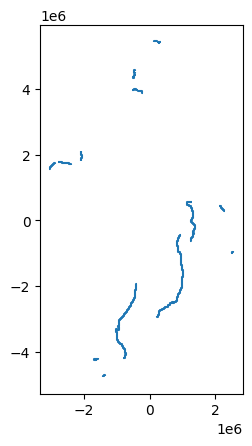

In [5]:
# Get a list of all shapefiles in the directory
shapefiles_dir = extract_path
shapefiles_list = [os.path.join(shapefiles_dir, file) for file in os.listdir(shapefiles_dir) if file.endswith('.shp')]

# Read and plot one of the shapefiles
fig, ax = plt.subplots()
gdf = gpd.read_file(shapefiles_list[0])
gdf.plot(ax=ax)
plt.show()


# Sorting shapefiles according to year

In [6]:
shapefiles_list[0].split('_')[2]

'201312'

In [7]:
def extract_ym(file_name):
    return int(file_name.split('_')[2])
    

# Creating an animation

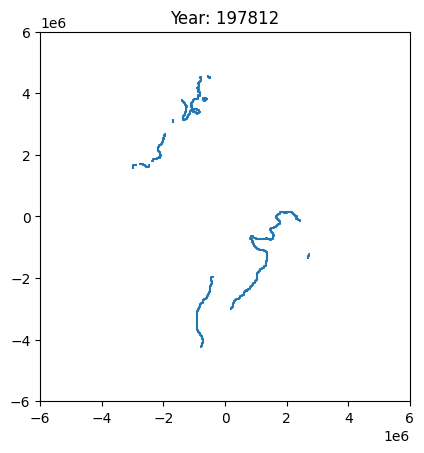

In [10]:
from matplotlib.animation import FuncAnimation
import os

# Path to the directory containing multiple shapefiles
shapefiles_dir = extract_path

# Get a list of all shapefiles in the directory
shapefiles_list = [os.path.join(shapefiles_dir, file) for file in os.listdir(shapefiles_dir) if file.endswith('.shp')]

# sort by year-mon
shapefiles_list = sorted(shapefiles_list, key = extract_ym)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Define a function to update the plot for each frame of the animation
def update(frame):
    ax.clear()
    # Read the shapefile for the current frame
    polylines_gdf = gpd.read_file(shapefiles_list[frame])
    # Plot the polylines for the current frame
    ax.set_xlim(-6e6, 6e6)  # Set x-axis limits
    ax.set_ylim(-6e6, 6e6)  # Set y-axis limits
    polylines_gdf.plot(ax=ax)
    ym = extract_ym(shapefiles_list[frame])
    ax.set_title(f'Year: {ym}')

# Create the animation
animation = FuncAnimation(fig, update, frames=len(shapefiles_list), interval=400)



In [11]:
animation.save('polylines.gif', writer='pillow')



<Figure size 640x480 with 0 Axes>

# Instead of polylines, now plot polygons

In [12]:
# change the path below to your own folder path
extract_path = '/seaice/polygonshp' 

In [13]:
archive_url = "https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/"

r = requests.get(archive_url)
data = BeautifulSoup(r.text, "html.parser")

for l in data.find_all("a")[1:]:
       file_path = archive_url + l["href"]
       print(file_path)
       if 'polygon' in file_path:
            r = requests.get(file_path)
            if r.status_code == 200:
                # Extract the zip file contents directly into a folder
                with zipfile.ZipFile(io.BytesIO(r.content), 'r') as zip_ref:
                    zip_ref.extractall(extract_path)
            else:
                print("Failed to download the zip file.")

https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_197812_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_197812_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_197912_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_197912_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_198012_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_198012_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_198112_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_198112_polyline_v3.0.zip
https://noaadata.apps.nsidc.

https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201312_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201412_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201412_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201512_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201512_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201612_polygon_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201612_polyline_v3.0.zip
https://noaadata.apps.nsidc.org//NOAA/G02135/north/monthly/shapefiles/shp_extent/12_Dec/extent_N_201712_polygon_v3.0.zip
https://noaadata.apps.nsidc.

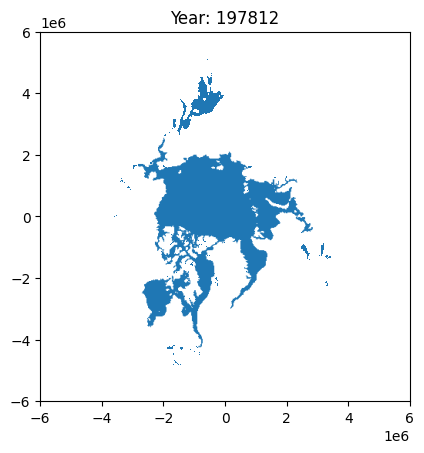

In [14]:
# Path to the directory containing multiple shapefiles
shapefiles_dir = extract_path

# Get a list of all shapefiles in the directory
shapefiles_list = [os.path.join(shapefiles_dir, file) for file in os.listdir(shapefiles_dir) if file.endswith('.shp')]

# sort by year-mon
shapefiles_list = sorted(shapefiles_list, key = extract_ym)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Define a function to update the plot for each frame of the animation
def update(frame):
    ax.clear()
    # Read the shapefile for the current frame
    polygons_gdf = gpd.read_file(shapefiles_list[frame])
    # Plot the polygons for the current frame
    ax.set_xlim(-6e6, 6e6)  # Set x-axis limits
    ax.set_ylim(-6e6, 6e6)  # Set y-axis limits
    polygons_gdf.plot(ax=ax)
    ym = extract_ym(shapefiles_list[frame])
    ax.set_title(f'Year: {ym}')

# Create the animation
polygon_animation = FuncAnimation(fig, update, frames=len(shapefiles_list), interval=400)



In [15]:
polygon_animation.save('polygons.gif', writer='pillow')

<Figure size 640x480 with 0 Axes>

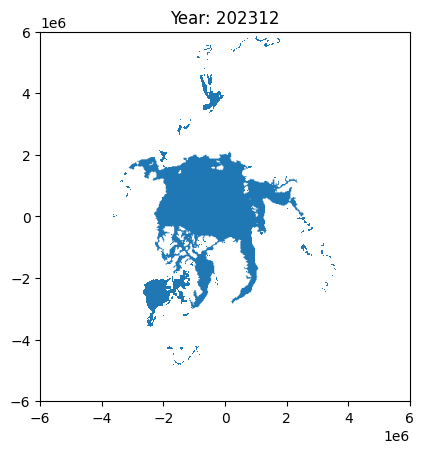

In [16]:
fig, ax = plt.subplots()
polygons_gdf = gpd.read_file(shapefiles_list[len(shapefiles_list) -1])
# Plot the polygons for the current frame
ax.set_xlim(-6e6, 6e6)  # Set x-axis limits
ax.set_ylim(-6e6, 6e6)  # Set y-axis limits
polygons_gdf.plot(ax=ax)
ym = extract_ym(shapefiles_list[len(shapefiles_list) -1])
ax.set_title(f'Year: {ym}')

plt.show()